In [1]:
# Make sure we can plot things
%matplotlib inline
import matplotlib.pyplot as plt

# Make sure we load the root containing the algos
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

# And keep just the one algo we'll be checking in this notebook
from Algos.FixedPointAlgos.BanachFixedPoint import FPAlgo as FPAlgo

Fixed point iterations
=================

This notebook is about Banach's fixed point iterations. 

In a nutshell: 
* Solves equations of the form $f(x) = x$. 
* Does not require the evaluation of a gradient
* Converges to the unique local minimum (under some conditions)

The gist of the algorithms is to reduce the search space little by little, by iterated applications of a constraction. 
Here, $f: X \to X$ is a contraction from the non-empty complete metrix space $X$ to itself. 
A contraction means that the distance between two points in $X$ will always shrink when passing through the mapping $f$. More formally, $f$ is a contraction if there exists a constant $L \in (0,1)$ such that 
$$
    d(f(x),f(y)) \leq L\dot d(x,y)
$$
for all $x,y \in X$. 

In [16]:
import numpy as np

In [17]:
functionToSolve = lambda x: np.sqrt(x)
x0 = 2
nbIter = 50

myFPIterations = FPAlgo(functionToSolve, x0, nbIter)

print(myFPIterations.solve())

1.0000000000000002


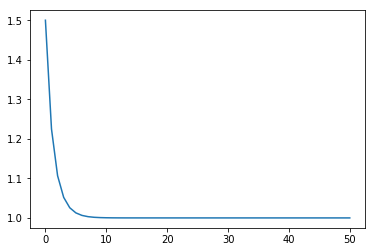

In [18]:
plt.plot(range(0,nbIter+1), myFPIterations.estimates)

It is usually better to display in log-log plots to understand convergences of algorithms: (conclude on what this tells us on the speed of the convergence?)

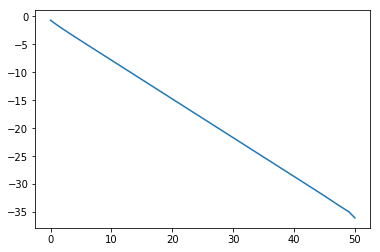

In [19]:
# We know what to expect here! 
xstar = 1

plt.plot(range(0,nbIter+1), np.log(np.abs([xstar - xn for xn in myFPIterations.estimates])))

In [20]:
sinFunction = lambda x: np.sin(x)
x0 = np.pi/2
nbIter_sin = 50000

sinesFPA = FPAlgo(sinFunction, x0, nbIter_sin)

print(sinesFPA.solve())

cosFunction = lambda x: np.cos(x)
x0 = 0.0
nbIter = 50

cosFPA = FPAlgo(cosFunction, x0, nbIter)

print(cosFPA.solve())

x0 = np.pi/2
cosFPA = FPAlgo(cosFunction, x0, 10*nbIter)

print(cosFPA.solve())

x0 = 0.5
cosFPA = FPAlgo(cosFunction, x0, nbIter)

print(cosFPA.solve())

0.007745353097869489
0.7390851321663374
0.7390851332151607
0.7390851326575361


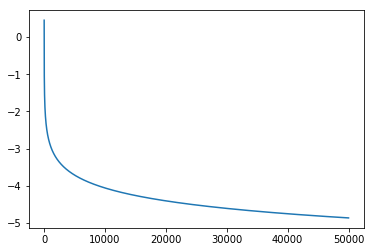

In [21]:
xstar = 0.0

plt.plot(range(0,nbIter_sin+1), np.log(np.abs([xstar - xn for xn in sinesFPA.estimates])))